## Functions

### Functions - Defining and Calling
def functionName (param1:dataType, param2:dataType):returnType = { body of the function; return returnValue}

In [ ]:
//Example One

{
    //function definition one
    def addNumbersOne(a:Int, b:Int):Int = {
      a + b ; //no return keyword needed
    }
    println(addNumbersOne(2,3))

    //function definition two - Return type inferred
    var cnt = 0
    def addNumbersTwo(a:Int, b:Int) = {
      a + b
    }
    cnt = addNumbersTwo(2,3)
    println(cnt)

    // notice the absence of the = sign before {
    // nothing returned from the function (a.k.a procedure?)
    var count = 0
    def addNumbersThree(a:Int, b:Int){
      count = a + b
    }
    addNumbersThree(2,3)
    println(count)

    //if you just have one expression, you can dispense with the braces too!
    def addNumbersFour(a:Int,b:Int) = a + b
    println(addNumbersFour(2,3))
}

### Functions - Default Arguments 

In [ ]:
//default arguments in functions

{
def addNumbersSix (a:Int = 2, b:Int = 3) = {
  a + b
}

//can you guess the output?
println(addNumbersSix())
println(addNumbersSix(5)) 
println(addNumbersSix(b = 5)) 
}

In [ ]:
// more on functions

{
    def addNumbersSeven(a:Int = 3, b:Int) = {
      a + b
    }
    println(addNumbersSeven(b=9))

    //cannot do this - function expects value for b
    //addNumbersSeven(6) //3 applies by default to a

    def addNumbersTen(a:Int, b:Int = 3) = a + b

    println(addNumbersTen(4))
    println(addNumbersTen(4,5))
    
    addNumbersSeven(5)
}

In [ ]:
//variable number of arguments



def addNumbersEight(numbers:Int*) = {
  var sum = 0
  numbers.foreach(sum+=_)
  sum
}
println(addNumbersEight(1,2,3,4,5,6,100))

//cannot do this!
//You can have only one varArgs as a function parameter

def addNumbersNine(dummy:String,numbers:Int*) = {
  var sum = 0
    println(dummy)
    numbers.foreach(i => sum += i)
  sum
}

addNumbersNine("scala",1,2,3,4,5)

//def addNumbersEleven(numbers1:Int*, numbers2:Int*) = {numbers1.foreach(i => println(i))}



In [ ]:
//This illustrates the use of teh _* operator
//comes in handy later

{
    def addNumbersEightA(numbers:Int*) = {
      var sum = 0
      numbers.foreach(sum+=_)
      sum
    }


    val mybuffer = Array(1,2,3,4,5)
    //addNumbersEightA(mybuffer)
    
    println(s"sum = ${addNumbersEightA(mybuffer:_*)}")
    println(s"sum = ${addNumbersEightA(1,2,3,4,5)}")
    
}


### Functions - val/var as input parameter; overloading

In [ ]:
//can you change the input paramters to a function?
//A best practice in Effective Java?  Implemented in Scala out of the box

{
    def testFunction (var par1:Int)
    {
        println(par1)
        par1 = 9
    }


    testFunction(5)
}

In [ ]:
//parameters to function - can you change them?
{
    import scala.collection.mutable.ArrayBuffer
    
    def funcByValOrRef(myb:ArrayBuffer[Int])
    {
        //change element 1
        //myb(0) = 99
        
        //now, add a new ArrayBuffer
        myb ++= ArrayBuffer(4,5,6)
        //myb = ArrayBuffer(4,5)
    }
    
    val mybuffer = ArrayBuffer(1,2,3)
    funcByValOrRef(mybuffer)
    println(mybuffer)
}

In [ ]:
//scope
{
var globalvar = 10
    
def mytestfunc() = {
    var globalvar = 20
    println(s"Inside the function: $globalvar")
}

mytestfunc
println(globalvar)

}

## Collections - Arrays, ArrayBuffers, Maps, Tuples, Lists

### Arrays 
** Fixed Size Data Stucture that stores homegenous elements (Elements are mutable)**

In [ ]:
//Declaring Arrays
var a = new Array[Int](10)

In [ ]:
var s = new Array[String](10)

In [ ]:
var hw = Array("hello","world") //declare + initialize

In [4]:
//assigning values to array

{
    //assigning values to array 'a'
    var a = new Array[Int](10)
    for (i <- 0 until 10) {a(i) = i * 8}
    
    println(a.mkString(";"))
    
    //println
    var s = ('a' to 'j').toArray
    //s.foreach(print)
    println(s.mkString(" "))
    
    //You can change the value after assignment
    s(9) = 'a'
    s //You can see the last element changed to 'a'
}

0;8;16;24;32;40;48;56;64;72
a b c d e f g h i j


[a, b, c, d, e, f, g, h, i, a]

In [ ]:
//mixing array elements (datatypes)
{
    //creating an array of odd numbers from 1 to 100
    var oddNum = (1 to 100).toArray.filter(_ % 2 != 0)
    print(oddNum.mkString(" "))

    //you can also create this
    var studentMarks = Array(1,"Anurag","Math",99)
}

In [5]:
//Other ways of creating arrays

{
    var x1 = Array.range(1, 10)
    println(x1.mkString(" "))

    x1 = Array.range(0, 10, 2)
    println(x1.mkString(" "))

    var  x2 = Array.fill(3)("foo")
    x2
}

1 2 3 4 5 6 7 8 9
0 2 4 6 8


[foo, foo, foo]

In [6]:
//some utility functions

{
    var numArray = Array(109,4,56, 90, 87, 4)
    println(numArray.max)
    println(numArray.min)
    println(numArray.size)
    scala.util.Sorting.quickSort(numArray)
    var newArray = numArray.clone //copying an array
    numArray.sorted.reverse
}

109
4
6


[109, 90, 87, 56, 4, 4]

In [15]:
//val vs var in Arrays

{
    val valArray = Array(1,2,3)
    var varArray = Array(1,2,3,4,5,6,7,8)
    println(valArray.mkString(" "))
    println(varArray.mkString(" "))
    //var myarray = (0 to 1000).toArray
    //println(myarray.size)
    valArray(1) = 4
    varArray(1) = 4
    println(valArray.mkString(" "))
    println(varArray.mkString(" "))

    //valArray = Array(5,6) //Wont be allowed - Reassignment to val
    varArray = Array(1,2,3,4,5,6,7,8,9,10,11)
    println(varArray.mkString("**"))
}

1 2 3
1 2 3 4 5 6 7 8
1 4 3
1 4 3 4 5 6 7 8
1**2**3**4**5**6**7**8**9**10**11


### ArrayBuffers

In [20]:
//Size can be changed as also the elements


        import scala.collection.mutable.ArrayBuffer

        // declaring + initialization
        var myABuffer = new ArrayBuffer[Int]()
        var myABuffer1 = ArrayBuffer(1,2,3,4,5)

        println(myABuffer.mkString(" "))
        println(myABuffer1.mkString(" "))

        //adding elements 
        myABuffer += 100
        myABuffer += 200

        //if you are using += to add multiple elements, wrap it in ()
        //The other alternative to add mutliple elements is to use ++= and use Array()
        myABuffer += (300,900,999)
        println(myABuffer.size) //number of elements in the array
        println(myABuffer.mkString(" "))

        //adding another Array!
        myABuffer ++= Array(54,55,56)
        println(myABuffer.mkString(" "))

        //removing an element
        myABuffer --= Array(56)
        println(myABuffer.mkString(" "))

        myABuffer.insert(2,254) //inserts at second location
        println(myABuffer.mkString(" "))

        myABuffer.insert(2,3,4,5) //inserts many elements starting from the second location
        println(myABuffer.mkString(" "))

        myABuffer.remove(1) //removed ele at first location
        println(myABuffer.mkString(" "))

        myABuffer.remove(2,2) //removes 2 elements from the second loc
        println(myABuffer.mkString(" "))

        myABuffer.trimEnd(2) //removes the last two elements
        println(myABuffer.mkString(" "))

        myABuffer += 3
        println(myABuffer.mkString(" "))
    
        myABuffer -= 3 //removes one element '3'
        println(myABuffer.mkString(" "))




1 2 3 4 5
5
100 200 300 900 999
100 200 300 900 999 54 55 56
100 200 300 900 999 54 55
100 200 254 300 900 999 54 55
100 200 3 4 5 254 300 900 999 54 55
100 3 4 5 254 300 900 999 54 55
100 3 254 300 900 999 54 55
100 3 254 300 900 999
100 3 254 300 900 999 3
100 254 300 900 999 3


myABuffer = ArrayBuffer(100, 254, 300, 900, 999, 3)
myABuffer1 = ArrayBuffer(1, 2, 3, 4, 5)


ArrayBuffer(1, 2, 3, 4, 5)

In [21]:
//to see if a value exists in the ArrayBuffer
{
    println(myABuffer.mkString(" "))
    println(myABuffer.exists(_ == (300)))

    //create an array that holds only elements divisible by 100 in myABuffer
    var onlyHundred = for (element <- myABuffer if (element % 100 == 0))  yield element
    println(onlyHundred)
    
    var newBuff = new ArrayBuffer[Int]
    myABuffer.foreach(ele => newBuff += ele*2)

    println(newBuff.mkString(" "))
}

100 254 300 900 999 3
true
ArrayBuffer(100, 300, 900)
200 508 600 1800 1998 6


### Maps (Both Immutable and Mutable Versions)

In [31]:
//create a IMMUTABLE map
{

var m1 = Map(1 -> "student11", 2 -> "student12")

//The same as:
val m3 = Map((1,"student11"),(2,"student12"))

//accessing elements
println(m1(1)) //retrieves the first "value" - "student1" for the key 1

//Accessing a key not present
//println(m1(45))//key not found! Exception

//A better way!
println(m1.getOrElse(1,"Student Not Found"))
println(m1.getOrElse(45,"Student Not Found"))

//Or Create the map the following way
m1 = Map(1 -> "student11", 2 -> "student12").withDefaultValue("Default Value: Student Not Found")
println("Result of searching the new map: " + m1(45))
println("Result of searching the new map: " + m1(2))


println(m1.get(1)) //alternate access - using options!
println(m1.get(45))

//cannot do this because map is immutable
//m1(1) = "newvalue"

//declared as var
m1 += (3 -> "student13")
    m1

//declared as val
//m3 += (3 -> "student13")
  //  m3
  
m1(1) = "newstudent"
}

Name: Unknown Error
Message: <console>:65: error: value update is not a member of scala.collection.immutable.Map[Int,String]
       m1(1) = "newstudent"
       ^

StackTrace: 

In [28]:
//Let us create a MUTABLE map

{
    import scala.collection.mutable.Map
    import scala.io.Source

    var m2 = Map(1 -> "student21", 2 -> "student22")
    println("m2 contains: " + m2)

    //accessing elements
    println("Getting value or key 1 : " + m2(1))
    //m2(45)

    println(m2.getOrElse(45,"Student Not Found"))

    //adding a new element now
    //m2 already contains keys 1 and 2
    //You can see that the earlier value of "student22" for key 2 is replaced with "student100"
    //which is the new value added
    m2 += (5 -> "student25", 2 -> "student100")
    println("After adding keys 2 and 5: " + m2)

    ////you can concatenate another map (duplicate keys are removed)
    val m1 = Map(1 -> "student11", 2 -> "student12")
    m2.++=(m1)
    println("After adding another map: " + m2)

    //you can remove elements also
    m2 -= (1)
    println("After removing element with key 1: " + m2)
    
    //allowed because this map is mutable
    m2(2) = "newstudent"
    m2
}

m2 contains: Map(2 -> student22, 1 -> student21)
Getting value or key 1 : student21
Student Not Found
After adding keys 2 and 5: Map(2 -> student100, 5 -> student25, 1 -> student21)
After adding another map: Map(2 -> student12, 5 -> student25, 1 -> student11)
After removing element with key 1: Map(2 -> student12, 5 -> student25)


Map(2 -> newstudent, 5 -> student25)

In [ ]:
//Iterating through the map
//to print both keys and values of all the entries in a map

{
    var m2 = Map(1 -> "student21", 2 -> "student22")

    m2.keys.foreach{n =>
      print(n + "  ")
      println (m2(n))
    }

    println
    println("Other way of accessing")
    println

    //alternate way of doing the same
    for ((k,v) <- m2) println(s"key is $k and value is $v")
}

In [ ]:
//Displaying population for a given country - An example

{
    import scala.io.Source

    val content = Source
      .fromFile("populationByCountry.txt")
      .getLines.toArray


    val mapLookup = 
    Map(content.map
        (sekar => (sekar.split("\t")(0).toString
                   , sekar.split("\t")(1).toLong)) : _*).withDefaultValue(0L)
    println(mapLookup)

    println(s"There are ${mapLookup.size} countries in the file")
    println(mapLookup("Argentina"))
    println(mapLookup("India"))

    //display all the countries in the Map datastructure
    println(mapLookup.keys.mkString(" "))

    //find the maximum population of the given countries
    println(mapLookup.values.max)

    //sorting keys
    println(mapLookup.keys.toArray.sorted.mkString(","))
    
    //finding key with the "max" value
    println(mapLookup.keys.max)
    
    //find the country with the max population
    println(mapLookup.maxBy(_._2))

}

### Tuples (Immutable) 

In [ ]:
//tuples combines different values together and you can pass them
//around as a whole
//matches, innings, not outs, total runs

{
    val t = (1, "Virat Kohli", 64, 108,8,5301)

    //access the first element
    println(t._1) //access the first element
    println(t._2) //access the second element
    println(t._3) //access the third element
    println(t._4) //access the fourth element
    println()
    //using the foreach syntax
    //print each element of the tuple using an iterator
    println("Printing tuple elements using an iterator")
    t.productIterator.foreach(i => print(i + " "))
}

In [ ]:
//tuples allow you to return a collection from a method

{
    def myfunction() ={
      val empid = 1; val empname = "sriram"; val emplocation = "bangalore"
      (empid,empname,emplocation)
    }

    //one way of accessing values
    val empdetails = myfunction
    print(s"${empdetails._1} + ${empdetails._2} +   ${empdetails._3}")

    //second way
    val(id,name,location) = myfunction()
    println(id);println(name);println(location)
}

In [ ]:
//A practical Example
{
    import scala.io.Source
    { //this flower bracket turns off the output other than explicitly called out by print
    val content = Source.
      fromFile("Batsman.csv")
      .getLines.toArray

    def HundredsAndRuns(player:String) = {

      val playerRecords = content.
        filter(n => (n.split("\t")(1)).
          split("#")(0) == player)

        println(playerRecords.mkString("\n"))

      //Number of hundreds across formats
      val hundreds = playerRecords.
        map(n => n.split("\t")(6).toInt).sum

      //Runs across formats
      val runs = playerRecords.
        map(line => line.split("\t")(5).toInt).sum

      //Return a tuple
      (player,hundreds,runs)
    }

    val(p,h,r) = HundredsAndRuns("RT Ponting")
    println
    println(s"Player: $p  ; Hu ndreds: $h  ;Runs: $r")
    }
}

## Functions Revisited (A bit of Functional Programming)

### Anonymous Functions

In [ ]:
//let us say you want to double a number and you write a function

{
    
    def myDouble (num:Int):Int = {
        num * 2
    }
    
    //you want to double all the numbers in a collection
    var myCol = Array(1,2,3,4,5)
    var res1 = myCol.map(myDouble)
    println(s"Doubled Values Array using first method: ${res1.mkString(" ")}")

    
    //An easy way to achieve the same
    var res2 = myCol.map(a => a * 2)
    println(s"Doubled Values Array using second method: ${res2.mkString(" ")}")

    
    var myFunc = (m:Int) => m * 2
    var res3 = myCol.map(myFunc)
    println(s"Doubled Values Array using third method: ${res3.mkString(" ")}")

    //you can call myFunc too!
    println(myFunc(44))
    
}

### Function assigned to a variable!

In [ ]:
//Finding Prime Numbers

{
    val primeCheck = (i: Int) => {
          var flag = 0;
          for (index <- 2 to i/2)
          {
            if (i % index == 0)
              flag = 1;
          }
          if (flag == 1) false else true
        }

    primeCheck(7)
    List.range(1,100).filter(primeCheck)
}

### Higher Order Functions

In [ ]:
//Example One
{
    def sum (a: Int, b: Int): Int = a + b
    def mul (a: Int, b: Int): Int = a * b
    def div (a: Int, b: Int): Int = a / b
    def sub (a: Int, b: Int): Int = a - b

    def execute(f:(Int, Int) => Int, a:Int, b:Int)= f(a,b)

    println(s"Sum Operation : ${execute(sum,2,1)}")
    println(s"Mul Operation : ${execute(mul,2,3)}")
    println(s"Div Operation : ${execute(div,6,2)}")
    println(s"Sub Operation : ${execute(sub,10,2)}")
    println(s"Sum Operation : ${execute((a,b)=> a+b,10,9)}")
}

In [ ]:
//Example Two (uses filter, map and reduce)

{

    //let us find the sum of all numbers given to us
    def sumAll (mylist:List[Int]) : Any = {var sum = 0; mylist.foreach(sum += _); sum}
    sumAll(List(1,2,3))

    def sumEven(mylist:List[Int]) : Any = 
    {var sum = 0; mylist.foreach{x => if (x % 2 == 0) sum += x};sum}
    sumEven(List(1,2,3))
    
    def sumOdd(mylist:List[Int]) : Any = mylist.filter(_%2 != 0).sum
    sumOdd(List(1,2,3))
    
    
    def revSortList(mylist:List[Int]):Any = mylist.sortWith(_>_)
    
    def doubleElements(mylist:List[Int]):Any = mylist.map(_*2).sum 
    
    def sumAlternateImp(mylist:List[Int]):Any = mylist.reduce((a,e)=>a+e)
    
    def multiFunc(myList:List[Int],t:(List[Int]=>Any)) = t(myList)
    
    println(multiFunc(List(1,2,3),sumOdd))
    println(multiFunc(List(1,2,3),sumEven))
    println(multiFunc(List(1,2,3),sumAll))
    println(multiFunc(List(1,2,3),revSortList))
    println(multiFunc(List(1,2,3),doubleElements))
    println(multiFunc(List(1,2,3),sumAlternateImp))
    
    val newList = List(1,2,3)
    println(multiFunc(newList,(newList => newList.filter(_%2!=0).sum)))
    
    
}

In [ ]:
//Word Count in Scala

{
    import scala.collection.mutable.ArrayBuffer
    
        val myFile = List( 
    "Exception: IndexOutOfBounds",
    "Exception: File Not Found",
    "Exception: Insufficient Memory",
    "Warning: Using an old library",
    "Warning: Unused Variable"
    )

        val test = myFile
        .flatMap(line => line.split(" "))
        .map{d => (d,1)}
        .groupBy(_._1) //gets you a map collection
        .mapValues(list=>{list.map(_._2).sum})

        print(test)


    // A map on the list above
    //You end up getting a list of arrays
    val testList = myFile.map(l => l.split(","))
    println(testList.foreach(l => println(l.mkString(" "))))

    
    //illustrating mapValues function
    val myMap = Map(('a',10),('b',11))
    val mynewMap = myMap.mapValues(_*2)
    println(mynewMap)
    


    //https://stackoverflow.com/questions/4386127/what-is-the-formal-difference-in-scala-between-braces-and-parentheses-and-when
    //You could do 
    //val test = myFile.map(line => line.split("\n")(0)) 
    //also val test = myFile.map{line => line.split("\n")(0)}
    //Note the use of () in first and {} in second for the map function
    
}

### Nested Functions

In [ ]:
//function within a function

{
    
    def genRandNum1(a:Int) = {
        val r = scala.util.Random
        r.nextInt(a)
    }
    
    genRandNum1(100)
    
    /*
        
    def genRandNum = {
        def genRandNum(a:Int) : Int= {
            val r = scala.util.Random
            r.nextInt(a)
        }
        genRandNum(100)
    }


    //genRandNum
    */
}

### Calling by name and calling by value
+ The figure below taken from Martin Odersky Coursera course

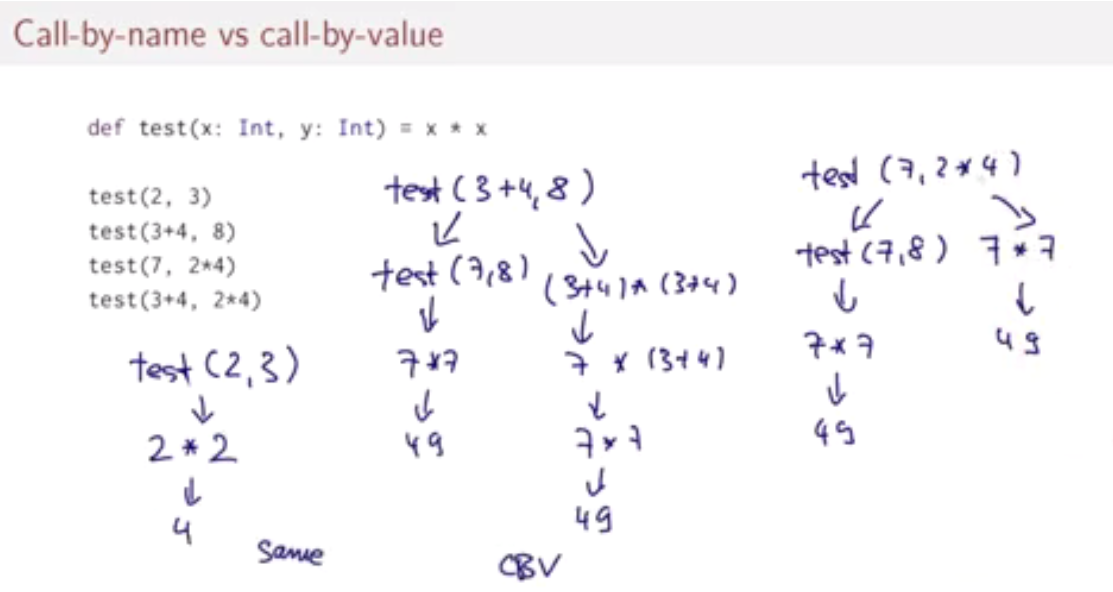

In [ ]:
//A call-by-name mechanism passes a code block to the call and each time the call accesses 
//the parameter, the code block is executed and the value is calculated.   

{

    def time() : Long ={
     println("in time function.....")
     return System.nanoTime()
   }
    
   def exec(t: => Long) : Unit = {
     println("Enter the exec function")
     println("Time :" +t)
     println("calling t again")
     println("Time :" +t)
   }

    exec(time())
}

In [ ]:
//call by value

{

    def time() : Long ={
        println("in time function.....")
        return System.nanoTime()
   }
    
   def exec(t: Long) = {
     println("Enter the exec function")
     println("Time :" +t)
     println("calling t again")
     println("Time :" +t)
   }
    
   exec(time())

}

## Exception Handling

In [ ]:
//Exception Handling 

{
    import scala.io.Source
    import java.io.{FileNotFoundException, IOException}

    //val filename = "input.txt"
    val filename = "populationByCountry.txt"
    try {
        for (line <- Source.fromFile(filename).getLines) {
            println(line)
            
        val r = 10/1
            
        val p = Array(1,2)
            p(10)
            
            
        }
    } catch {
        case e: FileNotFoundException => println("Couldn't find that file.")
        case e: IOException => println("Got an IOException!")
        case e: Exception => println(s"custom Error: $e")
    }
    finally {
        printf("Exiting...")
    }
}

//There are other techniques in Scala that are available in Scala
//this section was to touch upon Exception Handling - please refer to official docs
//for more info

## Objects and Classes

In [ ]:
//demonstrate this inside Intellij
{

    object a_helloWorld {
      def main(): Unit = {
        println("Hello World!")
      }
    }

    a_helloWorld.main()
}

### Instantiating a class and calling methods

In [ ]:
{

    //variables passed are "val" - by default
class point(xc: Int, yc: Int) {
  var x: Int = xc
  var y: Int = yc

  println("This is getting called!")  
    
  def move(dx: Int, dy: Int) {
    x = x + dx
    y = y + dy
    println ("Point x location : " + x)
    println ("Point y location : " + y)
  }
}

val pointOne = new point(1,2)
pointOne.move(1,2)
pointOne.move(2,3)
    
val pointTwo = new point(3,4)
  
//this fails!    
//val pointThree = new point()
}

In [ ]:
//trying with "var" as class variables
{
    
class point(var xc: Int, var yc: Int) {
  
  println("This is getting called!")  
    
  def move(dx: Int, dy: Int) {
    xc = xc + dx
    yc = yc + dy
    println ("Point x location : " + xc)
    println ("Point y location : " + yc)
  }
}

val pointOne = new point(1,2)
pointOne.move(1,2)
pointOne.move(2,3)
    
val pointTwo = new point(3,4)
  
//this fails!    
//val pointThree = new point()
}

In [ ]:
//What if you wanted the point to be at the origin?

{
class point2(xc: Int, yc: Int) {
  var x: Int = xc
  var y: Int = yc

  def this()
  {
    this(0,0)
  }

  def this(xc:Int)
  {
    this(xc,0) //defaulting only yc
  }

  def move(dx: Int, dy: Int) {
    x = x + dx
    y = y + dy
    println ("Point x location : " + x)
    println ("Point y location : " + y)
  }
}

    val pointOne = new point2(1,2)
    pointOne.move(1,2)

  //Initializing with no parameters (defaults to 2,4)
  val pointTwo = new point2()
  pointTwo.move(1,2)

  //Initializing with only one (yc defaults to 0)
  val pointThree = new point2(1)
  pointThree.move(1,2)
}

In [ ]:
{
    
    class point(xc: Int = 2, yc: Int= 4)
    {
      var x: Int = xc
      var y: Int = yc

      def move(dx: Int, dy: Int) {
        x = x + dx
        y = y + dy
        println ("Point x location : " + x);
        println ("Point y location : " + y);
      }
    }
    
    val firstPoint = new point(1,2)
    firstPoint.move(1,2)

    val secondPoint = new point() //initialized to 2,4 default values
    secondPoint.move(1,2)

    val thirdPoint = new point(4) //passing only xc
    thirdPoint.move(1,2)

    val newPoint2 = new point(yc = 6) //can default xc here and pass yc
    newPoint2.move(1,2)
    
}

In [ ]:
//interesting reading
//How to make a class private so it cannot be created from the main function!
//https://stackoverflow.com/questions/1730536/private-and-protected-constructor-in-scala

//Which of the two is preferred: Using class parameters or fields?
//https://stackoverflow.com/questions/4850295/scala-instance-variables-best-practice


### Companion Objects

In [ ]:
//separation of concerns

{
    class countClassInstances {
      countClassInstances.count += 1
      println("Class Created!")
    }

    object countClassInstances {
      var count = 0
    }

    val inst1 = new countClassInstances
    println(countClassInstances.count)
    val inst2 = new countClassInstances
    println(countClassInstances.count)
    val inst3 = new countClassInstances
    println(countClassInstances.count)

}

In [ ]:
{
    object companionObject {

      def testFunction(): Unit = {
        println("This is in the test function of the companion object")
      }

      private def privateFunction(): Unit = {
        println("This function is inside the companion object and is declared private")
      }

      //access a private function inside of a class - with an "instance variable"
      def myFunc(f:companionObject) = {
        f.funcPrivateToClass()
      }
    }

    class companionObject {
      val testVariable = 10;

      def testFunc(): Unit = {
        println("I am in the test function of the class sampleobject")
        companionObject.testFunction()

        //can call private methods of companion object from class - no problems!
        companionObject.privateFunction()
      }

      def funcInsideClass(): Unit = {
        println("This is a function inside the class!")
      }

      private def funcPrivateToClass(): Unit = {
        println("Private function inside the class!")
      }
    }



  println("I am in main")
  val cobj = new companionObject
  cobj.funcInsideClass() //calling function within a class
  cobj.testFunc()
  //directly calling a function in the object (without instantiating a class)
  companionObject.testFunction()
  //companionObject.privateFunction() //NOT ALLOWED
  println("I am done calling the test function")
  companionObject.myFunc(cobj)
}

### Inheritance

In [ ]:
{
    
    class person {
        def personalInfo {println ("Name,Age,Location,City,Marital Status")}
    }
    
    //a class can inherit from only one super class
    class employee extends person {
        def employeeInfo {println("EmpId, DeptId, DateOfJoining, Designation")}
        
        //look at the override modifier
        override def personalInfo {println ("SpouseName, NumberOfKids");super.personalInfo}
    }
    
    val pObj = new person
    pObj.personalInfo
    
    println
    
    val eObj = new employee
    eObj.personalInfo
    println
    eObj.employeeInfo
    
    println
    
}

//You can refer to this article to see how to pass paramters 
//https://alvinalexander.com/scala/how-to-declare-constructor-parameters-extending-scala-class

### Abstract Classes

In [ ]:
{
    abstract class shape {
        def area {println("This is the base class!")}
        def sides
    }

    class circle (rad:Int) extends shape {
        
        //note the override keyword - area is implemented in base
        override def area {println(s"This is the area of a circle: ${rad*rad}")}
        
        //The absence of the override keyword for this function
        def sides {println("No sides for a circle")}
    }

    class rectangle(length:Int,width:Int) extends shape{
        
        //it is alright to comment this out!  base class func implemented
        //def area {println(s"This is the area of a rectangle: ${length*width}")}
        
        //The absence of the override keyword - but, the function should be implemented
        def sides {println("A rectangle has two sides")}
    }
    
    //the class is declared as abstract as it does not implement "sides"
    abstract class square(length:Int) extends shape {
        override def area {println("The area of the square is: {length * length}")}
    }
    
    class squaresides(length:Int) extends shape {
        override def area {println(s"The area of the square is: ${length * length}")}
        def sides {println{"The sides of a square are equal"}}
    }
    
    //cannot do this!
    //val sObj = new shape()
    //sObj.area

    //let us create a circle
    val cObj = new circle(8)
    cObj.area
    cObj.sides

    //let us create a rectangle
    val rObj = new rectangle(7,8)
    rObj.area
    rObj.sides
    
    //let us try to instantiate an object of class square (note this is abstract)
    //val sObj = new square(8) //Not allowed again!
    
    val ssObj = new squaresides(9)
    ssObj.sides
    ssObj.area
}

### Traits
+ Just like an abstract class - but, allows a class to inherit from more than one trait
+ Does not have constructor parameters
+ Dont use it if you want to inherit this in java code 
+ Yes.. scala from java is possible (https://lampwww.epfl.ch/~michelou/scala/using-scala-from-java.html)
+ If behavior is going to be reused across multiple classes, go for traits

In [ ]:
{
    
trait calculator {
  def add(numbers:Int*):Int
  def sub(numbers:Int*):Int
  def mul(numbers:Int*):Int
  def div(numbers:Int*):Int
}

class calc extends calculator {
  def add(numbers:Int*) :Int = numbers.sum
  def sub(numbers:Int*): Int = numbers.reduce(_ - _)
  def mul(numbers:Int*): Int = numbers.product
  def div(numbers:Int*): Int = numbers.reduce(_ / _)
}

trait sciCalc {
  def log(number:Int):Double //= java.lang.Math.log(number)
  def pow(base:Int, exponent:Int):Double = java.lang.Math.pow(base,exponent)
  def sqrt(number:Int):Double = java.lang.Math.sqrt(number)
}

class casio extends calc with sciCalc{
  def log(number:Int): Double = java.lang.Math.log(number)
}

    val calcObj = new calc
    println(s"Result of Add Operation: ${calcObj.add(1,2,3,4)}")
    println(s"Result of Sub Operation: ${calcObj.sub(10,2)}")
    println(s"Result of Mul Operation: ${calcObj.mul(10,2,5)}")
    println(s"Result of Div Operation: ${calcObj.div(10,2,5)}")

    println
    
    val fx100 = new casio
    println(s"Result of Add Operation: ${fx100.add(1,2,3,4)}")
    println(s"Result of Sub Operation: ${fx100.sub(10,2)}")
    println(s"Result of Mul Operation: ${fx100.mul(10,2,5)}")
    println(s"Result of Div Operation: ${fx100.div(10,2,5)}")
    println(s"Result of Log Operation: ${fx100.log(10)}")
    println(s"Result of Pow Operation: ${fx100.pow(2,3)}")
    println(s"Result of Sqrt Operation: ${fx100.sqrt(16)}")
}

### Multiple Inheritance

In [ ]:
{
    trait base{
      def basefunc: Unit = {println("I am the parent")}
    }

    trait childOne extends base {
      override def basefunc: Unit = {
        println("I am child One");
        //super.basefunc;
      }
    }

    trait childTwo extends base {
      override def basefunc: Unit = {
        println("I am child Two");
        //super.basefunc;
      }
    }

    class familyOne extends childOne with childTwo 

    class familyTwo extends childTwo with childOne 

    val robFamily = new familyOne
    robFamily.basefunc;

    val bobFamily = new familyTwo
    bobFamily.basefunc;
}